<a href="https://colab.research.google.com/github/tentenvi/tteessstt/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [18]:
!pip install datasets seaborn

In [19]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel('Real estate valuation data set.xlsx') #чтение файла
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


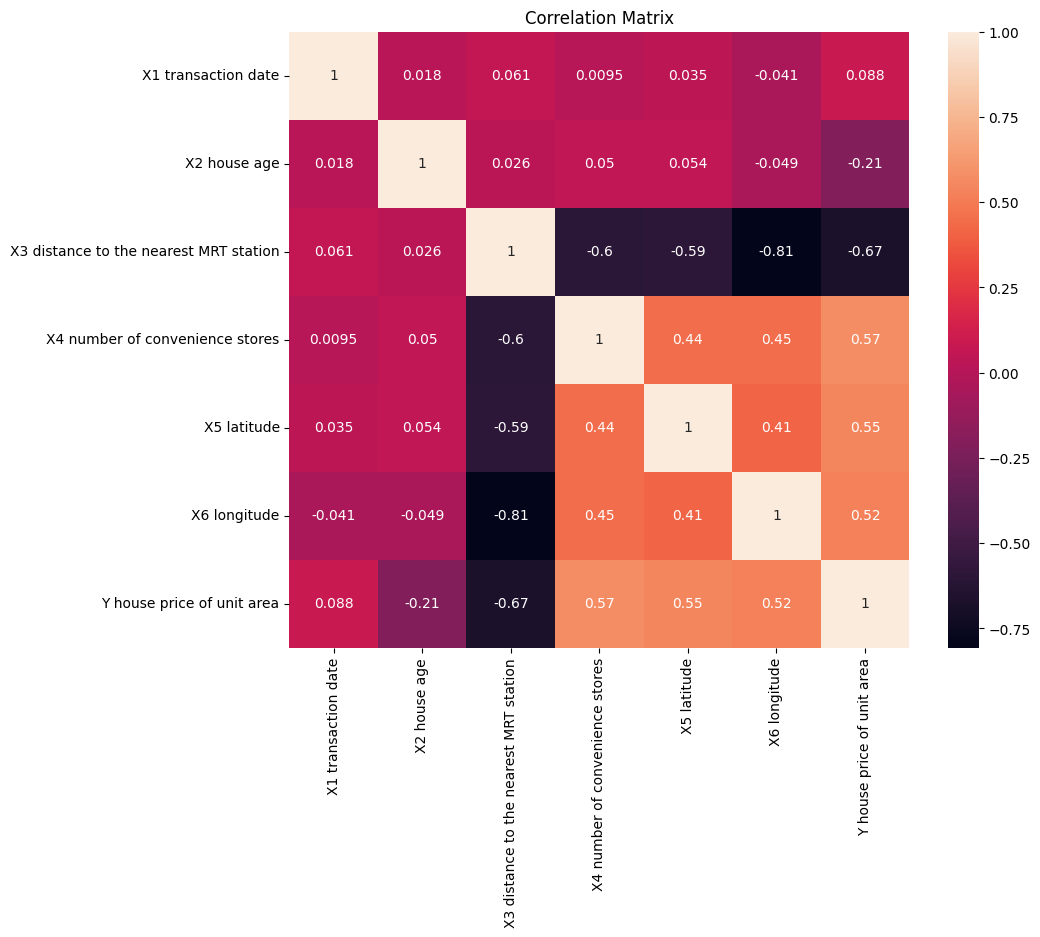

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [ ]:
# Пример разделения на обучающую и тестовую выборку
X = df
y = df.Y_house_price_of_unit_area  #целевая переменная
X = X.drop('Y_house_price_of_unit_area', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 331 строка на оубчение и 83 строки на валидацию

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
df['X4_number_of convenience_stores'] = df['X4_number_of convenience_stores'].astype('category')



In [ ]:
df = df.drop('X1_transaction_date', axis=1)

In [ ]:
df

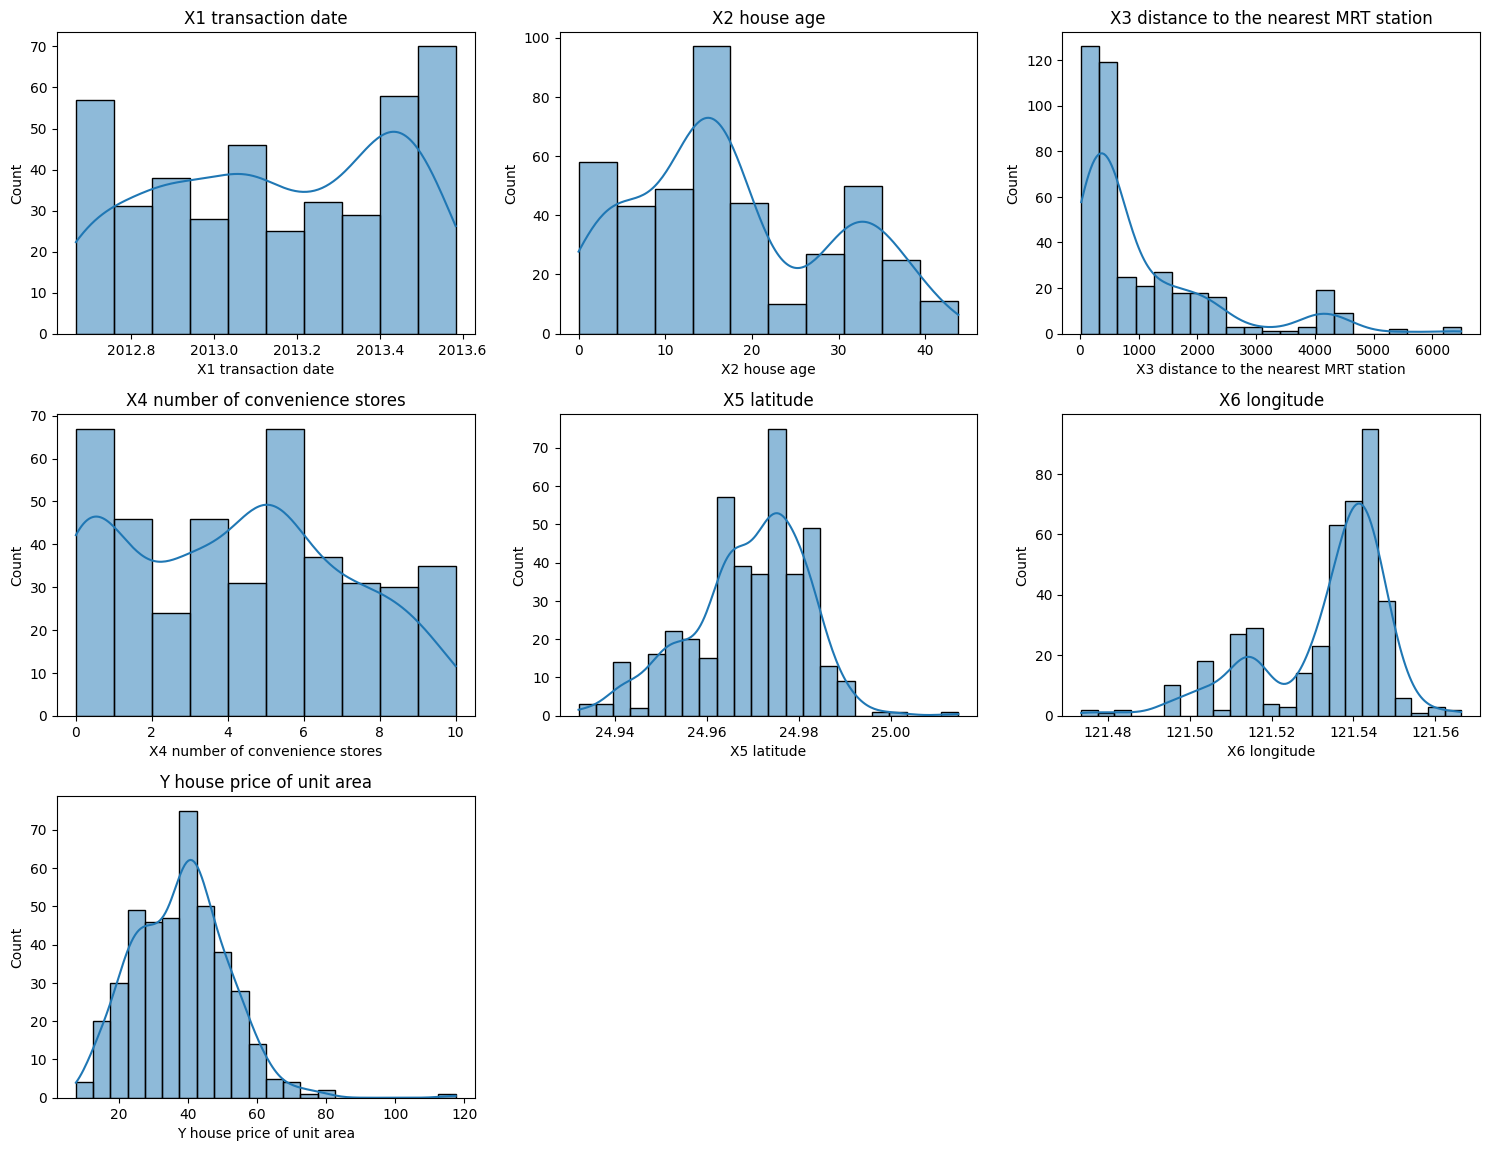

In [33]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4_number_of convenience_stores')

plt.show()

ValueError: Could not interpret value `X4_number_of convenience_stores` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

<Axes: >

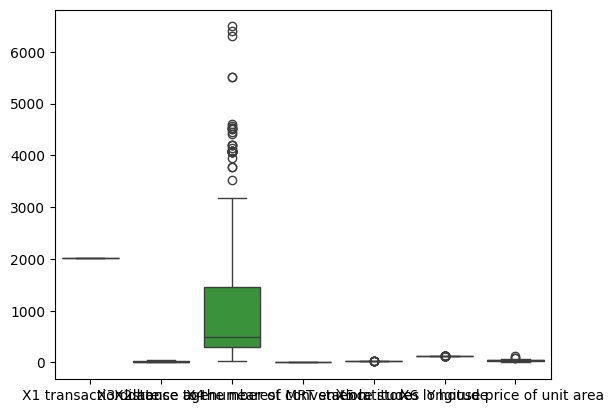

In [35]:
sns.boxplot(data=df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['X2_house_age', 'X3_distance_to _the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']])
number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
# Объединение масштабированных признаков и dummy переменных
df_transformed = pd.DataFrame(scaled_features, columns=['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude'])
df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

df_y = df['Y_house_price_of_unit_area'].reset_index()
df_itog = pd.concat([df_transformed,df_y['Y_house_price_of_unit_area'] , ], axis=1)
df_itog

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
df.describe()
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
X = df_itog.drop('Y_house_price_of_unit_area', axis=1)

In [ ]:
y = df_itog['Y_house_price_of_unit_area']

In [ ]:
"""
Код здесь
"""

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

In [ ]:
df_itog

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""